# WeatherPy
----

### Analysis
* As expected, as you approach the equator the temperature increases.
* Percent humidity doesn't seem to have much correlation to latitude. Most places experience >65% humidity and very few places fall below 20% humidity.
* I found no correlation between latitude and cloudiness but majority of cities fall in 0 and 80-100 cloudiness.
* It seems very few places experience wind speeds >25mph and majority of places experience wind speeds between 0-15mph. Besides that, there is no major correlation between wind speed and latitude.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1600)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1600)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Build City Data Frame table
cities_dfs= pd.DataFrame(cities)
cities_pd= cities_dfs.rename(columns={0:"City"})
cities_pd["Cloudiness"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Humidity"] = ""
cities_pd["Latitude"] = ""
cities_pd["Longitude"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""

In [4]:
#Build API calls for each city and add to table
count = 1 # counter to count the number of calls to API
sets = 0 # counter to count the number of call sets
index = 0 # index for the cities pd 
t0 =time.time() #current time
print("Beginning Data Retrieval")
print("----------------------------------")
for index, row in cities_pd.iterrows():
    city= row['City']
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{base_url}appid={api_key}&units={units}&q="
    response = requests.get(query_url+ city).json()
    print(f"Processing Record {count} of Set {sets}| {city}")
    
    try:
        cities_pd.loc[index, "Max Temp"] = response['main']['temp_max']
        cities_pd.loc[index, "Humidity"] = response['main']['humidity']
        cities_pd.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_pd.loc[index, "Country"] = response['sys']['country']
        cities_pd.loc[index, "Date"] = response['dt']
        cities_pd.loc[index, "Wind Speed"] = response['wind']['speed']
        cities_pd.loc[index, "Latitude"] = response['coord']["lat"]
        cities_pd.loc[index, "Longitude"] = response['coord']["lon"]
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    count= count + 1
    if count == 60: # because OpenWeatherMap free API limit is 60 API calls per minute.
        count = 1 
        sets = sets+1
        time.sleep(65)
        t0=time.time()

print("----------------------------------")
print("Data Retrieval Complete")
print("----------------------------------")

Beginning Data Retrieval
----------------------------------
Processing Record 1 of Set 0| albany
Processing Record 2 of Set 0| ostrovnoy
Processing Record 3 of Set 0| college
Processing Record 4 of Set 0| new norfolk
Processing Record 5 of Set 0| ust-nera
Processing Record 6 of Set 0| arraial do cabo
Processing Record 7 of Set 0| georgetown
Processing Record 8 of Set 0| vanimo
Processing Record 9 of Set 0| bluff
Processing Record 10 of Set 0| punta arenas
Processing Record 11 of Set 0| kapaa
Processing Record 12 of Set 0| taolanaro
City not found. Skipping...
Processing Record 13 of Set 0| la mana
Processing Record 14 of Set 0| kysyl-syr
Processing Record 15 of Set 0| alofi
Processing Record 16 of Set 0| ponta do sol
Processing Record 17 of Set 0| cape town
Processing Record 18 of Set 0| hilo
Processing Record 19 of Set 0| aswan
Processing Record 20 of Set 0| magadi
Processing Record 21 of Set 0| bredasdorp
Processing Record 22 of Set 0| port alfred
Processing Record 23 of Set 0| hamme

Processing Record 15 of Set 3| port blair
Processing Record 16 of Set 3| viransehir
Processing Record 17 of Set 3| coquimbo
Processing Record 18 of Set 3| katsuura
Processing Record 19 of Set 3| aykhal
Processing Record 20 of Set 3| luderitz
Processing Record 21 of Set 3| sao caetano de odivelas
Processing Record 22 of Set 3| tubruq
City not found. Skipping...
Processing Record 23 of Set 3| ayna
Processing Record 24 of Set 3| pevek
Processing Record 25 of Set 3| doctor pedro p. pena
City not found. Skipping...
Processing Record 26 of Set 3| rawson
Processing Record 27 of Set 3| port macquarie
Processing Record 28 of Set 3| butembo
Processing Record 29 of Set 3| nizhneyansk
City not found. Skipping...
Processing Record 30 of Set 3| hasaki
Processing Record 31 of Set 3| clonakilty
Processing Record 32 of Set 3| mount gambier
Processing Record 33 of Set 3| altay
Processing Record 34 of Set 3| ladozhskaya
Processing Record 35 of Set 3| serdobsk
Processing Record 36 of Set 3| esil
Processin

Processing Record 28 of Set 6| lata
Processing Record 29 of Set 6| scarborough
Processing Record 30 of Set 6| kofarnihon
City not found. Skipping...
Processing Record 31 of Set 6| lazarev
Processing Record 32 of Set 6| rungata
City not found. Skipping...
Processing Record 33 of Set 6| salalah
Processing Record 34 of Set 6| matongo
Processing Record 35 of Set 6| tazovskiy
Processing Record 36 of Set 6| klobuck
Processing Record 37 of Set 6| ajaigarh
Processing Record 38 of Set 6| ariguani
Processing Record 39 of Set 6| liaozhong
Processing Record 40 of Set 6| acandi
Processing Record 41 of Set 6| ahipara
Processing Record 42 of Set 6| cache creek
Processing Record 43 of Set 6| celestun
Processing Record 44 of Set 6| imeni poliny osipenko
Processing Record 45 of Set 6| isla mujeres
Processing Record 46 of Set 6| saleaula
City not found. Skipping...
Processing Record 47 of Set 6| lafiagi
Processing Record 48 of Set 6| doha
Processing Record 49 of Set 6| cabo san lucas
Processing Record 50

Processing Record 44 of Set 9| vila franca do campo
Processing Record 45 of Set 9| kudahuvadhoo
Processing Record 46 of Set 9| tuggurt
City not found. Skipping...
Processing Record 47 of Set 9| klyavlino
Processing Record 48 of Set 9| hobyo
Processing Record 49 of Set 9| morehead
Processing Record 50 of Set 9| iracoubo
Processing Record 51 of Set 9| brae
Processing Record 52 of Set 9| igra
Processing Record 53 of Set 9| nome
Processing Record 54 of Set 9| bodden town
Processing Record 55 of Set 9| tahta
City not found. Skipping...
Processing Record 56 of Set 9| manggar
Processing Record 57 of Set 9| nizhniy tsasuchey
Processing Record 58 of Set 9| caiaponia
Processing Record 59 of Set 9| sobolevo
Processing Record 1 of Set 10| bata
Processing Record 2 of Set 10| nevel
Processing Record 3 of Set 10| biak
Processing Record 4 of Set 10| shahgarh
Processing Record 5 of Set 10| alyangula
Processing Record 6 of Set 10| andenes
City not found. Skipping...
Processing Record 7 of Set 10| yuli
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Account for skipped cities by replacing empty rows with NaN then dropping rows with NaN value
cities_NA= cities_pd.replace('', np.nan) 
cities_df= cities_NA.dropna()
cities_df.to_csv(output_data_file)
cities_df.count()

City          553
Cloudiness    553
Country       553
Date          553
Humidity      553
Latitude      553
Longitude     553
Max Temp      553
Wind Speed    553
dtype: int64

In [6]:
cities_df['Date'] = cities_df['Date'].astype('float').map('{:.0f}'.format)
cities_df.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temp,Wind Speed
0,albany,1.0,US,1537760220,89.0,42.65,-73.75,53.06,2.17
1,ostrovnoy,0.0,RU,1537761478,93.0,68.05,39.51,42.95,14.58
2,college,75.0,US,1537757760,89.0,64.86,-147.80,50.00,3.36
3,new norfolk,40.0,AU,1537759800,37.0,-42.78,147.06,53.60,5.82
4,ust-nera,0.0,RU,1537761478,73.0,64.57,143.24,28.82,2.73


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

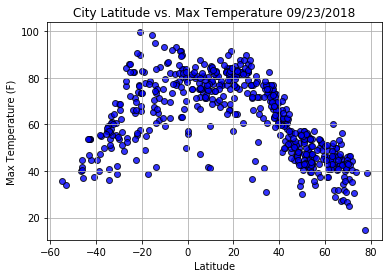

In [7]:
date=time.strftime("%m/%d/%Y")
latt= cities_df["Latitude"]
max_temp= cities_df["Max Temp"]
plt.scatter(latt, max_temp,marker ='o',facecolors ="blue", edgecolors='black',alpha = 0.8)
plt.title(f"City Latitude vs. Max Temperature {date}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Max Temperature.png")

#### Latitude vs. Humidity Plot

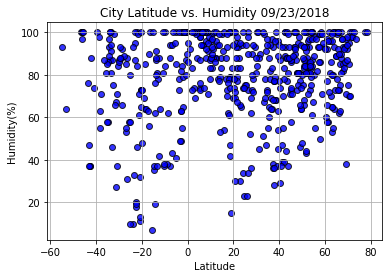

In [8]:
hum= cities_df["Humidity"]
plt.scatter(latt, hum,marker ='o',facecolors ="blue", edgecolors='black',alpha = 0.8)
plt.title(f"City Latitude vs. Humidity {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Humidity.png")

#### Latitude vs. Cloudiness Plot

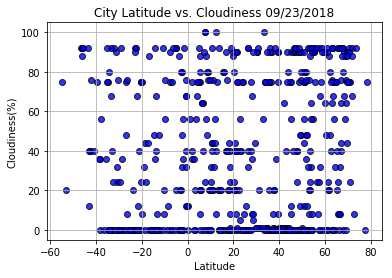

In [9]:
cloud= cities_df["Cloudiness"]
plt.scatter(latt, cloud,marker ='o',facecolors ="blue", edgecolors='black',alpha = 0.8)
plt.title(f"City Latitude vs. Cloudiness {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Cloudiness.png")

#### Latitude vs. Wind Speed Plot

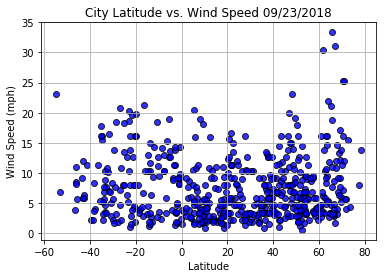

In [10]:
w_s= cities_df["Wind Speed"]
plt.scatter(latt, w_s,marker ='o',facecolors ="blue", edgecolors='black',alpha = 0.8)
plt.title(f"City Latitude vs. Wind Speed {date}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig("output_data/City Latitude vs. Wind Speed.png")